# Introdução aos cálculos de propriedades termodinâmicas e de equilíbrio de fases utilizando equações de estado (EoS) e modelos de ${G}^{\mathrm{ E}}$

* Elaborado por Antonio A. R. Patricio
* Disciplina Termodinâmica aplicada
* Trimestre 2016.3
* Rev.2 - Alteração dos parâmetros de Chafer por Renon e retorno do sinal + no cálculo de gamma

## Parte 2 - Uso da equação de estado + modelo de ${G}^{\mathrm{ E}}$ para cálculos com misturas binárias

## Cálculo de ${P}^{\mathrm{ sat}}$ pela Equação de Antoine

In [203]:
# Definição de Psat(T,Componente)
# Fonte DDBST

def P_antoine(T,comp):
    
    A=0
    B=0
    C=0
    
    if comp == 1: # Água
        if T<(1+273.15):
            return 0
    
        elif T<(100+273.15):
            A = 8.07131
            B = 1730.63
            C = 233.426
            
        elif T<(374+273.15):
            A = 8.14019
            B = 1810.94
            C = 244.485
        
        else:
            return 0
       
    elif comp == 2: #Etanol
        if T<(-57+273.15):
            return 0
    
        elif T<=(80+273.15):
            A = 8.20417
            B = 1642.89
            C = 230.3
            
        elif T<=(243+273.15):
            A = 7.68117
            B = 1332.04
            C = 199.2
        
        elif T == 5.1635e2:
            return 6.3e6
        
        else:
            return 0
    
    elif comp ==3: #Hexano
        
        if T < (-95+273.15):
            return 0 #no correlation available
        
        elif T <= (235+273.15):
            A=7.01051
            B=1246.33
            C=232.988
               
        else:
            return 0
       
    return 10**(A - B/(C+T-273.15))*101325/760 # T em Kelvin e P convertido para Pascal

## Modelo NRTL para Energia de Gibbs em Excesso ${G}^{\mathrm{ E}}$

O modelo de G de excesso escolhido neste trabalho é o modelo NRTL, descrito a seguir.

$$ \frac{g^E}{RT}=\sum_{i=1}^n \left[ x_i\frac{\sum_{j=1}^n \left[ \tau_{j,i} G_{j,i} x_{j} \right] }{\sum_{k=1}^n \left[ G_{k,i} x_k \right] } \right] $$

Onde:

$\tau_{i,j}= \frac{g_{i,j}-g_{j,j}}{RT}=\frac{A_{i,j}}{T}$

$G_{i,j}=\mathrm{exp}(-\alpha_{i,j} \tau_{i,j})$

Cada diferença $(g_{i,j}-g_{j,j})$ (em unidades de energia) e cada parametro de interação binaria  $A_{i,j}$ (em unidades de temperatura) são ajustados experimentalmente. 

Os coeficientes de atividade são calculados a partir derivação da expressão acima em relação ao numero de moles de cada componente i, mantendo constantes T, P e os demais componentes. 

 $$ln(\gamma_i)= \frac{\sum_{j=1}^n\left[\tau_{j,i} G_{j,i} x_{j}\right]}{\sum_{k=1}^n\left[G_{k,i}x_{k}\right]} + \sum_{j=1}^n\left[ \left(\frac{\ G_{i,j} x_{j}}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]}\right) \left(\tau_{i,j}-\frac{\sum_{j=1}^n\left[\tau_{i,j} G_{i,j} x_{i}\right]}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]} \right) \right] $$
 
Chafer calculou os coeficientes de interação binária entre água e etanol. Estes dados foram utilizados neste trabalho.
(Cháfer, Muñoz, Burguet, Berna, The influence of the temperature on the liquid–liquid equlibria of the mixture limonene + ethanol + $\mathrm {H_2O}$, Fluid Phase Equilibria 224 (2004) 251–256 [doi:10.1016/j.fluid.2004.06.045](https://doi.org/10.1016/j.fluid.2004.06.045)

In [204]:
import numpy as np

# Temperatura e composições de teste

T = 293.15            #K
x = np.array([.5,.5]) #normalized


# Renon, 1968

alpha12 = alpha21 = 0.3


# Parâmetros de interação binárias

#A12 = -1113.1 #K     # Chafer
#A21 = 1217.37 #K     # Chafer

A12 = 976*4.18/8.314      #K    Renon
A21 = 88*4.18/8.314       #K    Renon

In [205]:
#assemble matrix with regressed parameters A_i,j, according to the model all diagonal terms are zero
A = np.array([[0, A12],
             [A21, 0]])

#assemble symmetric matrix alpha
alpha = np.array([[0, alpha12],
                [alpha21, 0]])

print(alpha)

[[ 0.   0.3]
 [ 0.3  0. ]]


In [206]:
#verify the assembled matrices

#we can now automatically loop through its elements

print("i,j,alpha[i,j],A[i,j]")
for i in range(2):
    for j in range(2):
        print(i,j,alpha[i,j],A[i,j])
        
#or even use the whole matrix at once
print("")
print("alpha=")
print(alpha)
print("")
print("A=")
print(A)
print("")
# rather than typing each element individually
print("alpha12,alpha21")
print(alpha12,alpha21)
print("")
print("A12,A21")
print(A12,A21)

i,j,alpha[i,j],A[i,j]
0 0 0.0 0.0
0 1 0.3 490.700024056
1 0 0.3 44.2434447919
1 1 0.0 0.0

alpha=
[[ 0.   0.3]
 [ 0.3  0. ]]

A=
[[   0.          490.70002406]
 [  44.24344479    0.        ]]

alpha12,alpha21
0.3 0.3

A12,A21
490.7000240558095 44.24344479191724


In [207]:
# Matriz Tau

tau=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        tau[j,i]=A[j,i]/T
print("tau=")
print(tau)

print("")

# Matriz G

G=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
print("G=")
print(G)

tau=
[[ 0.          1.67388717]
 [ 0.15092425  0.        ]]

G=
[[ 1.          0.60521824]
 [ 0.95573244  1.        ]]


In [208]:
# Definição de Gamma

def Gamma(T,x,alpha,A):

    tau=np.zeros([2,2]) # Água e Etanol
    for j in range(2):
        for i in range(2):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([2,2])
    for j in range(2):
        for i in range(2):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([2])
    for i in range(2):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(2):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(2):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

print(Gamma(T,x,alpha,A))

[ 1.53603274  1.3173995 ]


In [209]:
# Teste do cálculo de Psat por Antoine

print("P_sat 1 =",P_antoine(T,1),"Pa")
print("P_sat 2 =",P_antoine(T,2),"Pa")

P_sat 1 = 2329.5753519365844 Pa
P_sat 2 = 5826.254353148996 Pa


## Cálculo do Ponto de Bolha da mistura (${P}_{\mathrm{ bolha}}$)

In [210]:
# P_bolha = Somatório (x(i) * gamma(i)* P(i)_sat)

def P_bolha(T,x):
    
    P = np.zeros(2)
    
    for i in range (2): # 2 componentes
        
#        P = 0      
#        P = P + x[i]*Gamma(T,x,alpha,A)[i]*P_antoine(T,i+1)
#        print(d,P)

        P[i] = x[i]*Gamma(T,x,alpha,A)[i]*P_antoine(T,i+1) # Para i=0 -> Componente=1 | Para i=1 -> Componente=2)
#        print (i,P[i])
    
    return P[i]+P[i-1]

# Teste da função

T_teste = 293.15
x_teste = [.5,.5]

# Imprime dos valores para as condições de teste

print("x 1 =",x_teste[0])
print("x 2 =",x_teste[1])
print("")
print("Gamma 1 =",Gamma(T_teste,x_teste,alpha,A)[0])
print("Gamma 2 =",Gamma(T_teste,x_teste,alpha,A)[1])
print("")
print("P_sat 1 =",P_antoine(T_teste,1),"Pa")
print("P_sat 2 =",P_antoine(T_teste,2),"Pa")
print("")
print("P_bolha =",P_bolha(T_teste,x_teste),"Pa")

x 1 = 0.5
x 2 = 0.5

Gamma 1 = 1.53603274397
Gamma 2 = 1.3173994982

P_sat 1 = 2329.5753519365844 Pa
P_sat 2 = 5826.254353148996 Pa

P_bolha = 5626.90429068 Pa


## Cálculo da curva de ELV da mistura (${P}_{\mathrm{ bolha}}$ e ${P}_{\mathrm{ orvalho}}$)

In [211]:
# Temperatura especificada

T_dado = 423.15 # Unidade K

grid_x1       = np.zeros(101)
grid_y1       = np.zeros(101)
grid_P_bolha  = np.zeros(101)

i = 0

for x1 in np.linspace(0,1,101):
    
    grid_x1[i]      = x1
    
    x2              = 1 - x1

    x_vetor         = [x1,x2]
    
    grid_P_bolha[i] = P_bolha(T_dado,x_vetor)
    
    grid_y1[i]      = x1*Gamma(T_dado,x_vetor,alpha,A)[0]*P_antoine(T_dado,1)/P_bolha(T_dado,x_vetor)
    
#    print(i,x1,u[i],grid_P_bolha[i])
    
    i = i+1
    
#print(grid_x1,grid_P_bolha,grid_y1)

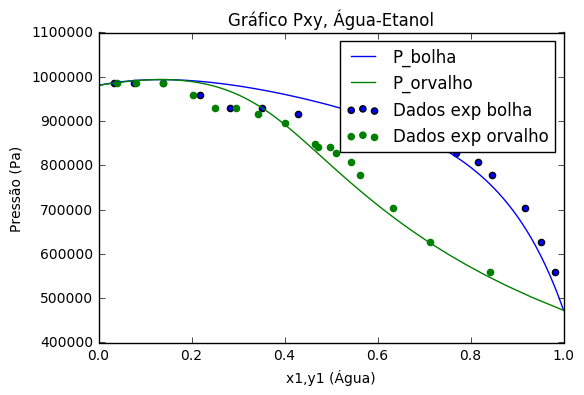

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 1
plt.figure(1)

#legend=[] #iniciador do objeto legenda


table = np.loadtxt('Etanol liquido 150 oC.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
table2 = np.loadtxt('Etanol vapor 150 oC.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

x_etanol = table[:,0]
x_agua =1- x_etanol
P_bol = table[:,1]*101325/(14.7)

y_etanol = table2[:,0]
y_agua = 1 - y_etanol
P_orv = table2[:,1]*101325/(14.7)

#plt.subplot(121) #activate a subplot
plt.title('Gráfico Pxy, Água-Etanol')
plt.xlabel('x1,y1 (Água)')
plt.ylabel('Pressão (Pa)')
plt.xlim([0,1])

#traçar
plt.scatter(x_agua,P_bol, label='Dados exp bolha')
plt.scatter(y_agua,P_orv,color='g', label='Dados exp orvalho')
plt.plot(grid_x1,grid_P_bolha, label='P_bolha') #label é a etiqueta que será usada na legenda
plt.plot(grid_y1,grid_P_bolha, label='P_orvalho') #label é a etiqueta que será usada na legenda



plt.legend(loc=1)

plt.show()

## Cálculo de Propriedades Termodinâmicas de Misturas

Nesta parte do trabalho, serão calculadas as propriedades em excesso: 
* Entalpia (${H^E}$), 
* Energia de Gibbs (${G^E}$)
* Entropia (${S^E}$). 

Ao final, será feita uma comparação com dados experimentais.

Uma propriedade em excesso corresponde a diferença entre o valor de uma propriedade para uma solução real e o valor da mesma propriedade para uma solução ideal, nas mesmas condições de T, P e x.

$\frac{G^E}{RT} = \frac{H^E}{RT} - \frac{S^E}{R}$

$\frac{G^E}{RT} = \sum_{i=1}^n \ x_{i} ln( \gamma_{i})$

Onde ($ln( \gamma_{i})$ é a propriedade parcial molar de $\frac{G^E}{RT}$). Para P e x constantes: 

${H^E} = - {RT}{^2} \frac{d(G^E/RT)}{dT} $

${S^E} =\frac{dG^E}{dT} $

### Definição das funções de cálculo de Gamma $(\gamma)$ e de Entalpia em Excesso (${H^E}$) por Algebra Linear

In [213]:
#trial temperature and composition:
T = 293.15 #K
x=np.array([.1,.3,.6]) #normalized

In [264]:
# Ethyl acetate (1) + water (2) + ethanol (3)

R = 8.314

alpha12_n = 0.4

alpha23_n = 0.3

alpha13_n = 0.3

# 6 binary Aij parameters
Dg12 = 1335 #K
Dg21 = 2510 #K

Dg23 = 976*4.18 #K
Dg32 = 88*4.18 #K

Dg13 = 301 #K
Dg31 = 322 #K

In [265]:
#assemble matrix with regressed parameters Dg_i,j, according to the model all diagonal terms are zero
Dg = np.array([[0, Dg12, Dg13],
             [Dg21, 0, Dg23],
             [Dg31, Dg32, 0]])

A_n = Dg/R

#assemble symmetric matrix alpha
alpha_n = np.array([[0, alpha12_n, alpha13_n],
                [alpha12_n, 0, alpha23_n],
                [alpha13_n, alpha23_n, 0]])

In [266]:
#verify the assembled matrices

#we can now automatically loop through its elements

print("i,j,alpha_n[i,j],A_n[i,j]")
for i in range(3):
    for j in range(3):
        print(i,j,alpha_n[i,j],A_n[i,j])
        
#or even use the whole matrix at once
print("alpha=")
print(alpha_n)
print("A=")
print(A_n)


# rather than typing each element indiividually
print("alpha12,alpha13,alpha23")
print(alpha12_n,alpha13_n,alpha23_n)
print("A12,A13,A21,A23,A31,A32")
print(Dg12,Dg13,Dg21,Dg23,Dg31,Dg32)

i,j,alpha_n[i,j],A_n[i,j]
0 0 0.0 0.0
0 1 0.4 160.572528266
0 2 0.3 36.2039932644
1 0 0.4 301.900408949
1 1 0.0 0.0
1 2 0.3 490.700024056
2 0 0.3 38.7298532596
2 1 0.3 44.2434447919
2 2 0.0 0.0
alpha=
[[ 0.   0.4  0.3]
 [ 0.4  0.   0.3]
 [ 0.3  0.3  0. ]]
A=
[[   0.          160.57252827   36.20399326]
 [ 301.90040895    0.          490.70002406]
 [  38.72985326   44.24344479    0.        ]]
alpha12,alpha13,alpha23
0.4 0.3 0.3
A12,A13,A21,A23,A31,A32
1335 301 2510 4079.68 322 367.84


In [267]:
tau_n=np.zeros([3,3])
for j in range(3):
    for i in range(3):
        tau_n[j,i]=A_n[j,i]/T
print("tau=")
print(tau_n)
        
G_n=np.zeros([3,3])
for j in range(3):
    for i in range(3):
        G_n[j,i]=np.exp((-alpha_n[j,i]*tau_n[j,i]))
print("G=")
print(G_n)

tau=
[[ 0.          0.54774869  0.12349989]
 [ 1.0298496   0.          1.67388717]
 [ 0.13211616  0.15092425  0.        ]]
G=
[[ 1.          0.80324181  0.96362798]
 [ 0.66236412  1.          0.60521824]
 [ 0.96114034  0.95573244  1.        ]]


In [268]:
# De acordo com o material Matrix Algebra and Matrix Differentiation Rules Applied To Excess Gibbs Energy Models 
# de Charlles R. A. Abreu

def Gamma_linalg(T,c_x,q_alpha, q_A): # here we chose to use the starting letters s, c, l, and Q to identify scalar variables, single column matrixes, single line matrixes and square matrixes to the reader
    # e_T should be an scalar value for temperature
    # c_x should be a single-column matrix(2d array) representing composition
    # q_alpha should be two matrix(2d array) representing component dependent parameters inferred from experimental data
    # q_tau should be two matrix(2d array) representing component dependent parameters inferred from experimental data
    
    q_tau     = q_A/T #element-wise division by scalar
    q_at      = q_alpha*q_tau #M2d * N2d yields element-wise multiplication
    q_minusat     = -q_at #element wise signal change
    q_G       = np.exp(q_minusat) #element wise exponentiation
    q_Lambda  = (q_tau*q_G) #element-wise multiplication
    q_GT      = q_G.T #M.T yields the transpose matrix of M;
    c_den     = q_GT @ c_x #M @ N yields the matrix multiplication between M and N
    c_invden  = 1/c_den #scalar 1 is broadcast for element-wise division
    l_invden  = c_invden.T #transposition of a single column matrix yields a single line matrix
    q_E       = q_Lambda * l_invden #element wise multiplication between (nl,nc) matrix M with (1,nc) matrix l broadcasts the element-wise multiplication of each (1,nc) submatrix of M with the unique (1,nc) matrix l
    q_L       = q_G * l_invden #broadcasting of element-wise multiplication
    l_x       = c_x.T #transposition of a single column matrix yields a single line matrix
    q_Lx      = q_L * l_x #broadcasting of element-wise multiplication
    q_ET      = q_E.T #transposition of square matrix
    q_LxET    = q_Lx @ q_ET #matrix multiplication
    q_ES      = q_E+q_ET #element-wise sum
    q_ESminusLxET = q_ES-q_LxET #element-wise subtraction
    q_ESminusLxETx     = q_ESminusLxET @ c_x #matrix multiplication
    gamma     = np.exp(q_ESminusLxETx) #element-wise exponentiation
    return gamma

In [269]:
# De acordo com o material Matrix Algebra and Matrix Differentiation Rules Applied To Excess Gibbs Energy Models
# de Charlles R. A. Abreu

def H_excesso_linalg(T,c_x,q_alpha,q_A):
    
    q_tau     = q_A/T #element-wise division by scalar
    q_at      = q_alpha*q_tau #M2d * N2d yields element-wise multiplication
    q_minusat     = -q_at #element wise signal change
    q_G       = np.exp(q_minusat) #element wise exponentiation
    q_Lambda  = (q_tau*q_G) #element-wise multiplication
    q_GT      = q_G.T #M.T yields the transpose matrix of M;
    c_den     = q_GT @ c_x #M @ N yields the matrix multiplication between M and N
    c_invden  = 1/c_den #scalar 1 is broadcast for element-wise division
    l_invden  = c_invden.T #transposition of a single column matrix yields a single line matrix
    q_E       = q_Lambda * l_invden #element wise multiplication between (nl,nc) matrix M with (1,nc) matrix l broadcasts the element-wise multiplication of each (1,nc) submatrix of M with the unique (1,nc) matrix 
    q_L       = q_G * l_invden #broadcasting of element-wise multiplication
    l_x       = c_x.T #transposition of a single column matrix yields a single line matrix
    q_Lx      = q_L * l_x #broadcasting of element-wise multiplication
    q_ET      = q_E.T #transposition of square matrix
    q_LxET    = q_Lx @ q_ET #matrix multiplication
    q_ES      = q_E+q_ET #element-wise sum
    q_ESminusLxET = q_ES-q_LxET #element-wise subtraction
    q_ESminusLxETx     = q_ESminusLxET @ c_x #matrix multiplication
    
    q_LambdaT    = q_Lambda/T
    q_G_dot      = q_LambdaT*q_alpha
    
    q_Lambda_dot = (q_A*q_G_dot - q_Lambda)/T    # Matriz 3x3
    
    #print(q_Lambda_dot)    
    ###
    
    #p1 = ( q_Lambda_dot - p1b)
    
    #p2 = 
    
    #q_E_dot = p1 * p2T
    ###
    
    
    q_G_dot_T    = q_G_dot.T                     # Matriz 3x3
    c_GdotTx    = q_G_dot_T @ c_x               # Matriz 3x1
    l_GdotTx = c_GdotTx.T

#    l_den_dot    = c_den_dot.T

    #q_E_dot = 

#    q_E_dot_p1   = (q_Lambda_dot - (q_E @ c_den_dot))  # Possível problema - Matrix 3x3 subtraindo de 3x1

    q_E_dot_p1   = q_E * l_GdotTx               # Matriz 3x1
    q_E_dot_p2   = q_Lambda_dot - q_E_dot_p1     # Matriz 3x3
    
    q_E_dot      = q_E_dot_p2 * l_invden       # Matriz 3x1
    
    H_exc_parc   = l_x @ q_E_dot @ c_x

    
    
    H_exc        = H_exc_parc*(-R*T**2)
    
    return H_exc.T

print(H_excesso_linalg(T,x_as_column,alpha_n,A_n)) #test using those trial input

[[ 485.36486441]]


In [270]:
x_as_line = np.array([x])

x_as_column = np.array([x]).T 

print(Gamma_linalg(T,x_as_column,alpha_n,A_n)) #test using those trial input
print("")
print(H_excesso_linalg(T,x_as_column,alpha_n,A_n)) #test using those trial input

[[ 1.2616122 ]
 [ 1.99577557]
 [ 1.10228962]]

[[ 485.36486441]]


In [271]:
print(x)

[ 0.1  0.3  0.6]


### Cálculo da Energia de Gibbs em Excesso (${G^E}$), Entalpia em Excesso (${H^E}$) e Entropia em Excesso (${S^E}$)

In [272]:
## Cálculo de G_excesso, H_excesso e TS_excesso

T_dado = 323.15 # Unidade K
R      = 8.3144598 #Pa.m3.mol^−1.K^−1 (Constante universal)

u=np.zeros(101)
G_exc=np.zeros(101)
H_exc=np.zeros(101)
TS_exc=np.zeros(101)

i = 0
for x2 in np.linspace(0,1,101):
        
    u[i] = x2
    x1 = 1 - x2
    x3 = 1 - x1 - x2
    
    x_vetor = [x1,x2]
        
    Gamma_vetor=Gamma(T_dado,x_vetor,alpha,A)
    
    Gamma1=Gamma_vetor[0]
    Gamma2=Gamma_vetor[1]

    G_exc[i]=(x1*np.log(Gamma1)+x2*np.log(Gamma2))*R*T_dado # Cálculo de H_exc
    
    x_vetor_3comp = [x3,x1,x2]
    x_vetor_3comp_col = np.array([x_vetor_3comp]).T
    
    H_exc[i]=H_excesso_linalg(T_dado,x_vetor_3comp_col,alpha_n,A_n)[0,0] # Cálculo de H_exc
    
    TS_exc[i]=H_exc[i]-G_exc[i]   # Cálculo de S_exc
    
    i = i+1

#print(G_exc)


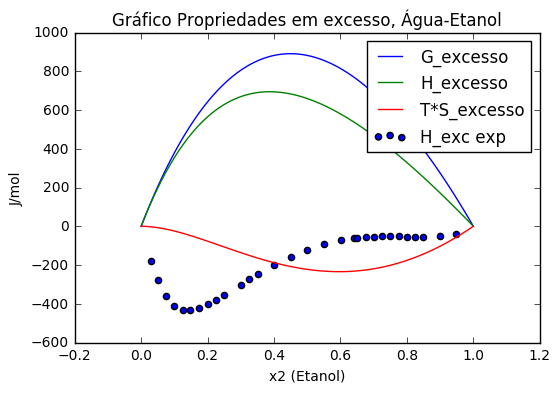

In [273]:
#plt.figure(1)

#legend=[] #iniciador do objeto legenda

plt.xlabel('x2 (Etanol)')

#Dados experimentais - H_excesso para Etanol @ T = 323.15 K
table5 = np.loadtxt('Hexcesso 323K.txt', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
x_exp_5 = table5[:,0] 
H_exp_5 = table5[:,1]

#traçar
plt.title('Gráfico Propriedades em excesso, Água-Etanol')
plt.xlabel('x2 (Etanol)')
plt.ylabel('J/mol')

plt.plot(u,G_exc, label='G_excesso') #label é a etiqueta que será usada na legenda
plt.plot(u,H_exc, label='H_excesso') #label é a etiqueta que será usada na legenda
plt.plot(u,TS_exc, label='T*S_excesso')
plt.scatter(x_exp_5,H_exp_5, label='H_exc exp')

plt.legend(loc=1)

plt.show()